# <a> Classificação </a>

Problemas relacionados à classificação sempre estiveram presentes num contexto financeiro e empresarial. Classificar transações bancárias como fraudulentas ou não, ou até mesmo prever o sentido (positivo ou negativo) da variação do preço de determinado ativo são apenas dois dos diversos casos em que tal abordagem é extremamente útil.

O que caracteriza os casos acima como problemas de classificação é o fato da variável dependente ser discreta. Em cada uma das situações descritas há apenas duas classes, mas este não é um fator limitante para os problemas de classificação, existindo, também, a possibilidade de prever uma variável discreta num contexto multiclasse. 

# <a> Visão Geral - Previsão de Churn no Setor de Telecomunicações </a>

A previsão de churn, em termos empresariais, refere-se à capacidade de uma organização antecipar e prever quais clientes estão em risco de deixar de utilizar os produtos ou serviços oferecidos pela empresa. O termo "churn" é usado para descrever a perda de clientes ou a taxa de cancelamento. Essa previsão é fundamental para as estratégias de retenção de clientes, pois permite que a empresa identifique os fatores que levam os clientes a saírem e tome medidas proativas para mitigar esse risco.

É nesse sentido que a previsão de churn pode gerar valor numa empresa: 
 * Incremento na receita por meio de uma maior retenção de clientes
 * Redução de custo de aquisição de novos clientes
 * Melhoria da satisfação do cliente por meio de maior atenção para os indicativos de churn

A previsão de churn se enquadra num problema de classificação pois é necessário que se tenham as informações acerca do estado do cliente: se deixou os serviços da empresa, ou não. Em virtude deste mesmo fato, também é nítido que o problema analisado se ajusta ao aprendizado de máquina supervisionado.

O presente projeto trata da previsão de churn numa empresa de telecomunicações. A base de dados utilizada pode ser obtida no [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) e se trata de uma empresa telefônica fictícia com dados demográficos e de serviços contratados pelos clientes com a informação se estes saíram ou não da empresa.

# <a> Objetivos </a>

Este trabalho conta com dois principais objetivos: 
1) Prever quais clientes são mais propensos a deixar os serviços da empresa de telefonia.
2) Extrapolar os resultados da base de dados utilizada e demonstrar como a previsão de churn tem alta capacidade de gerar valor em diversos segmentos.

Este projeto foi construído durante a formação da "Let's Data" - Jornada Cientista de Dados - https://www.letsdata.ai

In [1]:
# Importando bibliotecas necessárias 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
from scipy.stats import chi2_contingency
import prince
import warnings
warnings.filterwarnings("ignore")

# Configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Configuração do pandas para não mostrar notação científica para números
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Lendo os dados
df_customers = pd.read_csv("./data/raw data/train.csv")
df_customers.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [3]:
# Visualizando as colunas do dataframe
df_customers.columns

Index(['id', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Cada linha representa uma instância de dados, que nesse caso corresponde a um cliente. Dessa forma, todos os ID's são únicos.

In [4]:
# Verificando a afirmativa acima
df_customers['id'].is_unique

True

## <a> Dicionário de Dados </a>

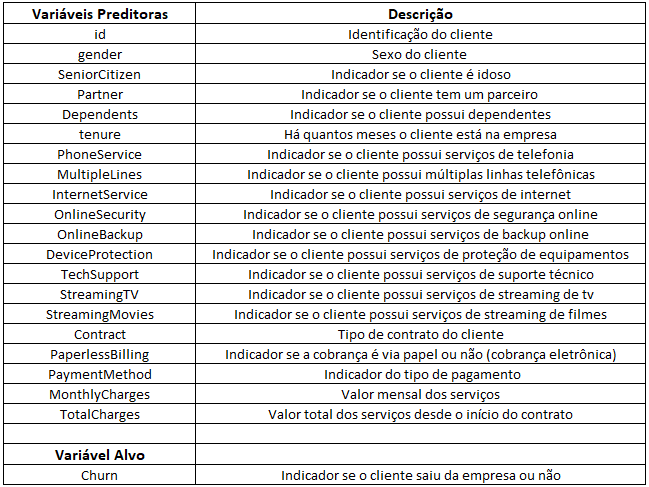

## <a> Manipulação de Dados Inicial </a>

In [5]:
# Visualizando os dados (coluna id pode ser utilizada como índice)
df_customers.head()

,id,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
1,6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
2,6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
3,6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
4,3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [6]:
# Setando a coluna 'id' como índice do DataFrame
df_customers = df_customers.set_index('id')
df_customers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
4030,Female,0,No,No,56.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,NaN,45.05,2560.1,0
6731,Male,0,Yes,Yes,NaN,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.65,332.65,0
6479,Female,0,Yes,No,60.00,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,6640.7,0
6861,Female,0,No,No,37.00,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.90,3545.35,1
3266,Male,0,Yes,Yes,29.00,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.75,1974.8,1


In [7]:
# Criando função para mostrar dimensões, tipos de coluna e demais informações do DataFrame
def informacao(dataframe):
    print(f"As dimensões do DataFrame são: {(dataframe.shape[0])} linhas e {(dataframe.shape[1])} colunas")
    print("\n")
    print(f"As colunas do DataFrame e seus tipos são:\n\n{dataframe.dtypes}")
    print("\n")
    print("Demais informações sobre o DataFrame: \n")
    dataframe.info()

In [8]:
# Chamando a função
informacao(df_customers)

As dimensões do DataFrame são: 5634 linhas e 20 colunas


As colunas do DataFrame e seus tipos são:

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object


Demais informações sobre o DataFrame: 

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 4030 to 103
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null  

In [9]:
# A feature 'TotalCharges' possui tipo 'object', mas deveria possuir tipo 'float'
df_customers['TotalCharges'].dtype

dtype('O')

In [10]:
# Criando função para checar valores das features
def valores(feature):
    return df_customers[feature].value_counts()

In [11]:
# Chamando a função (20 primeiras saídas)
valores('TotalCharges').head(20)

TotalCharges
20.2     8
         8
19.55    7
19.75    6
19.9     6
19.45    6
19.65    6
20.05    6
20.25    6
45.3     5
20.15    5
44.4     4
69.6     4
20.3     4
50.15    4
19.3     4
44       4
20.45    4
19.2     4
69.65    4
Name: count, dtype: int64

Há alguns valores em branco, essa pode ser a causa dessa feature estar com tipo 'object'. A fim de tratar este problema, utilizaremos expressões regulares.

In [12]:
# Atualizando a feature 'TotalCharges' para que os valores com espaços sejam substituídos por um nome 'vazio', tal qual a string "".
# \s significa qualquer caractere de espaço, enquanto \s+ significa um ou mais espaços
df_customers['TotalCharges'] = df_customers['TotalCharges'].replace("\s+", "", regex = True)

In [13]:
# Chamando a função novamente
valores('TotalCharges').head(20)

TotalCharges
20.2     8
         8
19.55    7
19.75    6
19.9     6
19.45    6
19.65    6
20.05    6
20.25    6
45.3     5
20.15    5
44.4     4
69.6     4
20.3     4
50.15    4
19.3     4
44       4
20.45    4
19.2     4
69.65    4
Name: count, dtype: int64

In [14]:
# Verificando novamente o tipo da feature
df_customers['TotalCharges'].dtype

dtype('O')

Os valores continuam ali, mas foram substituídos por uma string vazia "". No entanto, ainda é necessário converter tais valores para 'float'.

Como os valores que queremos converter são de strings vazias ("") para float, o método 'astype()' apresentará erros. Sendo assim, utilizaremos o método 'to_numeric()'.

In [15]:
# Filtrando as linhas em que a feature 'TotalCharges' é uma string vazia e não pode ser convertida para float
df_customers.loc[df_customers['TotalCharges'] == "", :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,
6755,Male,0,No,Yes,0.00,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0
5219,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6671,Female,0,Yes,Yes,0.00,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0
937,Female,0,Yes,Yes,0.00,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
3827,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
1083,Male,0,Yes,Yes,0.00,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
3332,Male,0,Yes,Yes,0.00,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
1341,Female,0,Yes,Yes,0.00,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0


In [16]:
# É interessante utilizar o método 'to_numeric()' pois podemos utilizar o parâmetro 'errors' como 'coerce' a fim de forçar a barra pra converter as
# strings vazias em float
pd.to_numeric(df_customers['TotalCharges'], errors = 'coerce').head(20)

id
4030   2560.10
6731    332.65
6479   6640.70
6861   3545.35
3266   1974.80
6368   3442.80
5830   1848.80
4476     61.05
1508   1008.70
2921   6155.40
3145    110.15
333    4422.95
2140    458.10
3427     69.80
3379   6033.10
3163   1394.55
6471    345.50
2350   6565.85
3756    318.90
305    3141.70
Name: TotalCharges, dtype: float64

In [17]:
# Selecionando os índices de onde o valor de 'TotalCharges' é uma string vazia 
indice_totalcharges_vazio = df_customers.loc[df_customers['TotalCharges'] == "", :].index
indice_totalcharges_vazio

# Visualizando como o método 'to_numeric()' converteria as linhas em que o valor de 'TotalCharges' era uma string vazia
pd.to_numeric(df_customers['TotalCharges'], errors = 'coerce')[indice_totalcharges_vazio]

id
6755   NaN
5219   NaN
6671   NaN
937    NaN
3827   NaN
1083   NaN
3332   NaN
1341   NaN
Name: TotalCharges, dtype: float64

Já tendo verificado como as mudanças ficariam, é hora de converter, de fato, a feature 'TotalCharges' para float

In [18]:
# Convertendo para 'NaN' (Not a number)
df_customers['TotalCharges'] = pd.to_numeric(df_customers['TotalCharges'], errors = 'coerce')

# Visualizando se há alguma linha em que a string vazia permanece na feature 'TotalCharges'
df_customers.loc[df_customers['TotalCharges'] == "", :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
id,,,,,,,,,,,,,,,,,,,,


In [19]:
# Chamando a função mais uma vez
valores('TotalCharges').head(20)

TotalCharges
20.20    8
19.55    7
20.25    6
19.65    6
19.90    6
19.45    6
20.05    6
19.75    6
45.30    5
20.15    5
44.40    4
20.30    4
50.15    4
19.30    4
44.00    4
69.60    4
20.45    4
19.20    4
69.65    4
74.35    3
Name: count, dtype: int64

In [20]:
# Verificando o tipo de todas as features novamente. 'TotalCharges' está como 'float' 
df_customers.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

## <a> Análise Exploratória de Dados </a>

Algumas perguntas podem ser respondidas por meio de uma análise exploratória bem construída. Além disso, é a partir desta que é possível escolher os melhores modelos para aplicar aos dados.

Durante essa seção, serão mostradas medidas de tendência central, distribuições e mais.

In [21]:
# Analisando algumas estatísticas descritivas
df_customers.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
25%,0.00,9.00,35.46,401.59,0.00
50%,0.00,29.00,70.25,1396.12,0.00
75%,0.00,55.00,89.80,3764.29,1.00
max,1.00,72.00,118.75,8684.80,1.00


Desconsiderando as variáveis 'SeniorCitizen' e 'Churn', que são discretas, é possível perceber que:
* A média de tempo que os clientes permanecem na empresa é de 32.33 meses
* O tempo máximo de permanência na empresa foi de 72 meses
* Apenas 25% dos clientes gastam mais de 89.90 dólares por mês
* A média de gastos por mês é de 64.63 dólares

Para conhecer a distribuição dos dados de forma mais clara, é importante utilizar a análise gráfica

### <a> Distribuições </a> 

In [22]:
# Criando função para visualização gráfica
def histograma(dados, var, legenda):
    '''
    Utiliza-se dos argumentos 'dados' (referente ao DataFrame),
    'var' (referente a feature do DataFrame) e 'legenda' (referente a legenda do eixo x e ao título, nessa ordem)
    para criar um histograma a fim de facilitar a análise gráfica da distribuição
    '''
    
    sns.set_style("white") # Setando estilo do seaborn 
    plt.figure(figsize=(8,4)) # Definindo tamanho do objeto figure
    sns.histplot(data = dados, x = f'{var}', color = 'midnightblue') # Plotando o gráfico
    sns.despine(bottom = True, left = True) # Retirando bordas
    plt.ylabel("Quantidade", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'y', labelsize = 9, color = 'grey') # e ajustando eixo y
    plt.xlabel(f"{legenda[0]}", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'x', labelsize = 9, color = 'grey') # e ajustando o eixo x
    
    # Colocando titulo
    plt.title(f"{legenda[1]}", color = 'k', pad = 20, fontsize = 15, fontweight = 'bold')
    
    # Mostrando 
    plt.show()

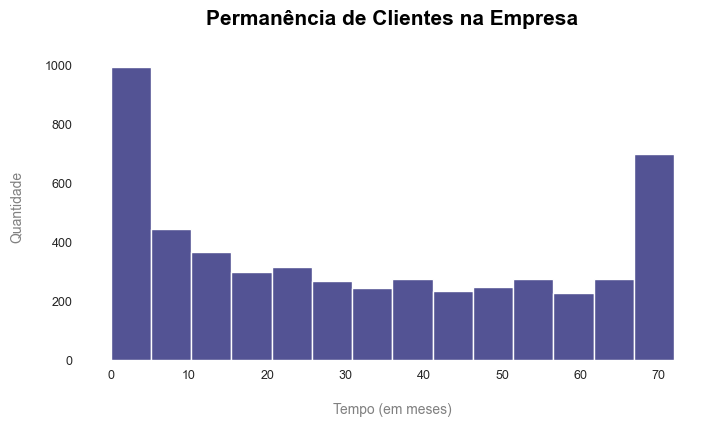

In [23]:
# Observando a distribuição da variável 'tenure' referente ao tempo de permanência dos clientes na empresa
histograma(df_customers, 'tenure', ('Tempo (em meses)', 'Permanência de Clientes na Empresa'))

Aqui existem dois cenários:
1) Primeiramente, é interessante notar que há muitos valores próximos de 0. Isso não significa necessariamente que os clientes estão ficando pouco tempo na empresa, uma vez que este fenômeno pode ocorrer devido a uma possível entrada de muitos clientes na organização. Levando em consideração que a base de dados utilizada representa uma Cross-Section (um recorte no tempo), deve-se ter em mente tais considerações.
2) Existem muitos valores considerados como o tempo de permanência máximo, que, como foi mostrado, corresponde a 72 meses (6 anos). Isso não significa que este é, de fato, o tempo máximo de permanência na empresa, já que existe a possibilidade da coleta dos dados utilizados ter começado há 6 anos e os clientes mais antigos estarem todos representados na última faixa (bin) do histograma, quando, na verdade, deveriam estar distribuídos entre outras faixas de tempo de permanência (de 72 meses pra cima).

Em razão disso, é importante checar os valores mais profundamente

In [24]:
# Analisando quantidade de clientes com permanência menor ou igual a 5 meses 
len(df_customers.loc[df_customers['tenure'] <= 5])

992

In [25]:
# Calculando percentual dos clientes com permanência menor ou igual a 5 meses
percentual = (len(df_customers.loc[df_customers['tenure'] <= 5])/df_customers.shape[0]) * 100

# Mostrando
print(f"{percentual:.2f}% dos clientes estão na empresa há 5 meses ou menos")

17.61% dos clientes estão na empresa há 5 meses ou menos


Uma grande parcela de clientes está na empresa há pouco tempo, o que pode ser, de fato, um indicativo de crescimento 

A fim de examinar o cenário 2 descrito acima, é possível dividir o total de consumo dos clientes (durante toda permanência na empresa) pelas despesas mensais, estimando, dessa forma, o tempo que estão na organização de telecomunicações

In [26]:
# Calculando a divisão dos gastos totais pelos gastos mensais
divisao = df_customers['TotalCharges']/df_customers['MonthlyCharges']

# Transformando em um Pandas DataFrame
df = pd.DataFrame(divisao, columns=['meses'])

# Visualizando
df.head()

,meses
id,
4030,56.83
6731,16.93
6479,59.93
6861,34.79
3266,27.91


In [84]:
# Calculando quantos clientes estão na empresa há mais de 6 anos
len(df.loc[df['meses'] > 72])

# Calculando percentual 
p = ((len(df.loc[df['meses'] > 72])/df.shape[0])*100)
print(f"De acordo com a estimativa calculada, {p:.2f}% dos clientes estão na empresa há mais de 6 anos")

De acordo com a estimativa calculada, 3.51% dos clientes estão na empresa há mais de 6 anos


In [28]:
# Visualizando as estatísticas descritivas com maior profundidade
df_customers.describe(percentiles = np.linspace(0,1,11))

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,5634.00,5173.00,5634.00,5626.00,5634.00
mean,0.16,32.33,64.63,2273.51,0.27
std,0.37,24.46,30.02,2258.38,0.44
min,0.00,0.00,18.25,18.80,0.00
0%,0.00,0.00,18.25,18.80,0.00
10%,0.00,2.00,20.05,85.50,0.00
20%,0.00,6.00,25.10,267.00,0.00
30%,0.00,12.00,45.80,550.98,0.00
40%,0.00,20.00,58.60,939.80,0.00
50%,0.00,29.00,70.25,1396.12,0.00


De fato é possível observar que:
* 30% dos clientes estão na empresa há 1 ano ou menos
* Apenas 20% dos clientes estão na empresa há 5 anos ou mais

Agora, serão analisadas as depesas mensais dos clientes

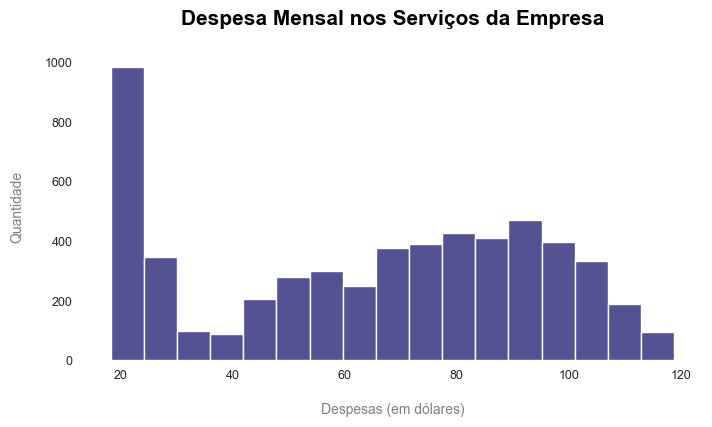

In [29]:
# Observando a distribuição da variável 'MonthlyCharges'
histograma(df_customers, 'MonthlyCharges', ("Despesas (em dólares)", "Despesa Mensal nos Serviços da Empresa"))

Como fica claro a partir da visualização do histograma, os dados revelam que a maioria dos clientes gasta de 20 a 25 dólares por mês, o que pode ser reflexo de um determinado perfil de consumidor (que possui poucos serviços ativos na empresa)

Agora, analisando as depesas totais, temos:

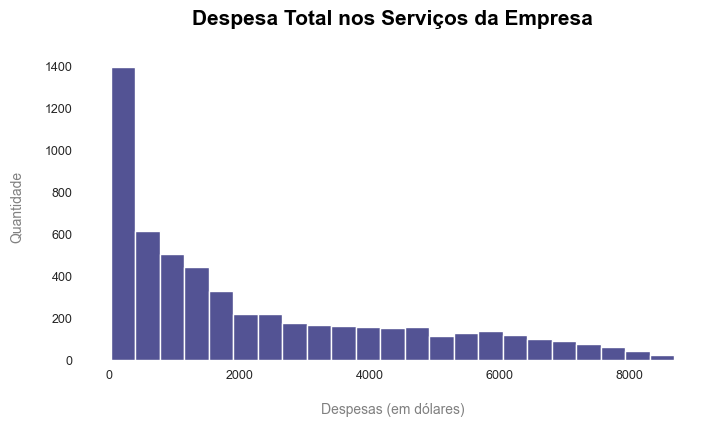

In [30]:
# Observando a distribuição da variável 'TotalCharges'
histograma(df_customers, 'TotalCharges', ("Despesas (em dólares)", "Despesa Total nos Serviços da Empresa"))

De forma similar às despesas mensais, é possível observar que há uma grande parcela de clientes com despesas totais relativamente baixas. No entanto, este pode ser um indicativo dos clientes que estão há pouco tempo na empresa.

Além disso, também é nítido que há poucos clientes com despesas totais altas. Levando em consideração que as despesas totais aumentam com o tempo de permanência, a estimativa calculada, de que menos de 4% dos clientes estão na empresa há mais de 6 anos, ajuda a compreender esse aspecto da distribuição.

### <a> Testes Qui-quadrado e Análise de Correspondência </a> 

Nesta subetapa da Análise Exploratória de Dados, serão aplicados vários testes qui-quadrado a fim de indentificar se algumas variáveis categóricas estão associadas ao Churn ou não. Caso o teste revele associação do par de variáveis, também serão aplicadas técnicas de análise de correspondência (ANACOR) com o objetivo de identificar quais categorias da variável de entrada estão associadas ao churn (variável de saída). 

Definindo funções para facilitar a análise:

In [31]:
# Criando função para calcular taxa de churn por meio da tabela de contingência
def taxa_churn(dados, var1, var2):
    '''
    Cria uma tabela de contingência por meio dos argumentos:
    dados: DataFrame resumido com apenas informações da variável de entrada e da variável de saída
    var1: Variável de entrada 
    var2: Variável de saída (Churn, neste caso)
    Após isso, são adicionados os percentuais referentes ao Churn (variável de saída) e as categorias de var1
    Retorna a tabela de contingência com os percentuais
    '''
    # Criando tabela
    tabela = pd.crosstab(dados[var1], dados[var2])

    # Adicionando percentual
    if tabela.shape[0] == 2:
        tabela['Percentual'] = ((tabela[1][0]/(tabela[1][0] + tabela[0][0])) * 100), ((tabela[1][1]/(tabela[1][1] + tabela[0][1])) * 100 )
    elif tabela.shape[0] == 3:
        tabela['Percentual'] = ((tabela[1][0]/(tabela[1][0] + tabela[0][0])) * 100,
        (tabela[1][1]/(tabela[1][1] + tabela[0][1])) * 100, (tabela[1][2]/(tabela[1][2] + tabela[0][2])) * 100)
    elif tabela.shape[0] == 4:
        tabela['Percentual'] = ((tabela[1][0]/(tabela[1][0] + tabela[0][0])) * 100,
                                 (tabela[1][1]/(tabela[1][1] + tabela[0][1])) * 100,
                                 (tabela[1][2]/(tabela[1][2] + tabela[0][2])) * 100,
                                 ((tabela[1][3]/(tabela[1][3] + tabela[0][3])) * 100))
        
    return tabela

In [32]:
# Criando função para mostrar Taxa de Churn por grupos
def barplot(dados, legenda):
    '''
    Cria um gráfico de barras contendo a taxa de Churn de acordo 
    com as classes da variável categórica por meio dos argumentos:
    dados: Tabela de contingência criada pela função taxa_churn
    legenda: Tupla de strings relacionadas, nessa ordem, a:
    1) Legenda para o eixo x
    2) Título do Gráfico
    '''
    # Definindo cores para a paleta
    color = ['#800080', '#FFFF00'] 
    
    # Setando estilo do seaborn 
    sns.set_style("white") 
    
    # Definindo tamanho do objeto figure
    plt.figure(figsize=(8,6)) 
    
    # Plotando gráfico
    sns.barplot(data = dados, x = dados.index, y = dados['Percentual'], palette = color)
    sns.despine(bottom = True, left = True) # Retirando bordas
    plt.ylabel("Taxa de Churn (%)", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'y', labelsize = 9, color = 'grey') # e ajustando eixo y
    plt.xlabel(f"{legenda[0]}", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'x', labelsize = 9, color = 'grey') # e ajustando o eixo x
    plt.title(f"{legenda[1]}", color = 'k', pad = 20, fontsize = 15, fontweight = 'bold') # Colocando título
    
    # Mostrnado
    plt.show()

In [33]:
# Criando função para cálculo do teste qui-quadrado
def qui_quadrado(dados, var1, var2):
    '''
    Calcula a estatística de teste, do teste qui-quadrado para independência, 
    e o p-valor associado a ela por meio dos seguintes argumentos:
    dados: DataFrame resumido com apenas informações da variável de entrada e da variável de saída
    var1: Variável de entrada 
    var2: Variável de saída (Churn)
    '''
    tabela_contingencia = pd.crosstab(dados[var1], dados[var2])
    chi2, p_value, graus_lib, tabela_conting = chi2_contingency(tabela_contingencia)
    print(f"A estatística de teste calculada foi: {chi2}")
    print(f"O p-valor calculado foi: {p_value}")

In [34]:
# Criando função para análise de correspondência ANACOR
def anacor(dados, var, n_components):
    '''
    Mostra a análise de correspondência por meio de um gráfico a partir dos seguintes parâmetros:
    dados: DataFrame resumido com apenas informações da variável de entrada e da variável de saída (Churn)
    var: Regere-se a variável de entrada
    n_components: Refere-se ao número de componentes no gráfico
    '''
    # Criando tabela de contingência
    tab = pd.crosstab(dados[var], dados['Churn'])
    # Criando objeto para Análise de Correlação 
    ca = prince.CA(n_components=n_components)
    # Ajustando o objeto com os dados 
    ca = ca.fit(tab)
    # Mostrando o plot com informações sobre a Análise de Correlação
    ca.plot_coordinates(tab)
    plt.show()

#### <a> Churn e Sexo </a> 

In [35]:
# Criando novo DataFrame com apenas informações de sexo e churn
churn_sexo = df_customers.loc[:,['gender', 'Churn']]

In [36]:
# Utilizando a função taxa_churn para calcular a tabela de contingência e os percentuais
taxa_sexo = taxa_churn(churn_sexo, 'gender', 'Churn')
taxa_sexo

Churn,0,1,Percentual
gender,,,
Female,2045,740,26.57
Male,2094,755,26.50


In [37]:
# Resultados
print(f"{taxa_sexo['Percentual'][0]:.2f}% das mulheres saíram da empresa")
print(f"{taxa_sexo['Percentual'][1]:.2f}% dos homens saíram da empresa")

26.57% das mulheres saíram da empresa
26.50% dos homens saíram da empresa


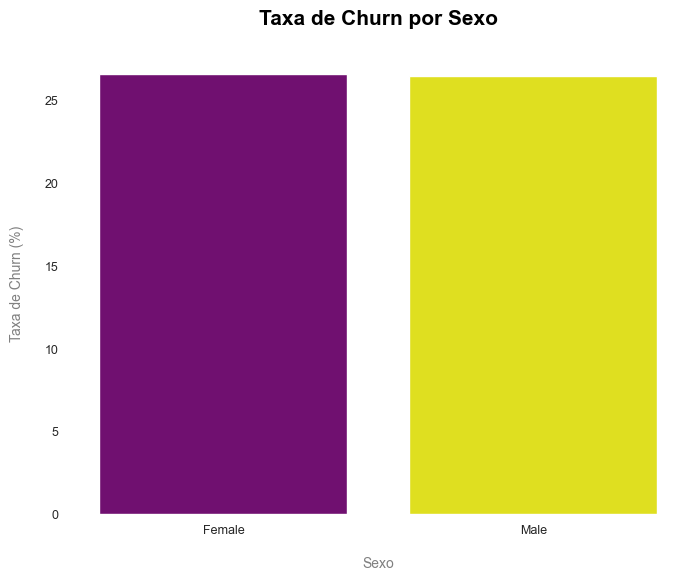

In [38]:
# Utilizando a função barplot para visualizar a taxa de churn por sexo
barplot(taxa_sexo, ('Sexo', 'Taxa de Churn por Sexo'))

A quantidade de Churn entre os sexos é bem parecida. Apesar disso, ainda é interessante utilizar o teste qui-quadrado a fim de observar se as variáveis são ou não associadas.

In [39]:
# Calculando o teste qui-quadrado para independência de variáveis
qui_quadrado(churn_sexo, 'gender', 'Churn')

A estatística de teste calculada foi: 0.0008792143067695747
O p-valor calculado foi: 0.9763449538995617


Levando em consideração as hipóteses do teste quii-quadrado para independência:

H0: Não há relações significativas entre as variáveis 

H1: Há relações significativas entre as variáveis 

E tendo como base o cálculo do p-valor, é possível identificar que, para um nível de significância de 5%, não há evidências suficientes (de acordo com os dados) para rejeitar a hipótese nula. Dessa forma, o teste indica que as variáveis sexo e churn são independentes.

#### <a> Churn e Dependentes </a> 

In [40]:
# Criando novo DataFrame com apenas informações de Dependents e churn
churn_dependents = df_customers.loc[:,['Dependents', 'Churn']]

In [41]:
# Usando a função que calcula a taxa de churn
taxa_dependentes = taxa_churn(churn_dependents, 'Dependents', 'Churn')
taxa_dependentes

Churn,0,1,Percentual
Dependents,,,
No,2615,1178,31.06
Yes,1376,247,15.22


In [42]:
# Resultados
print(f"{taxa_dependentes['Percentual'][0]:.2f}% dos clientes que não possuem dependentes saíram da empresa")
print(f"{taxa_dependentes['Percentual'][1]:.2f}% dos clientes que possuem dependentes saíram da empresa")

31.06% dos clientes que não possuem dependentes saíram da empresa
15.22% dos clientes que possuem dependentes saíram da empresa


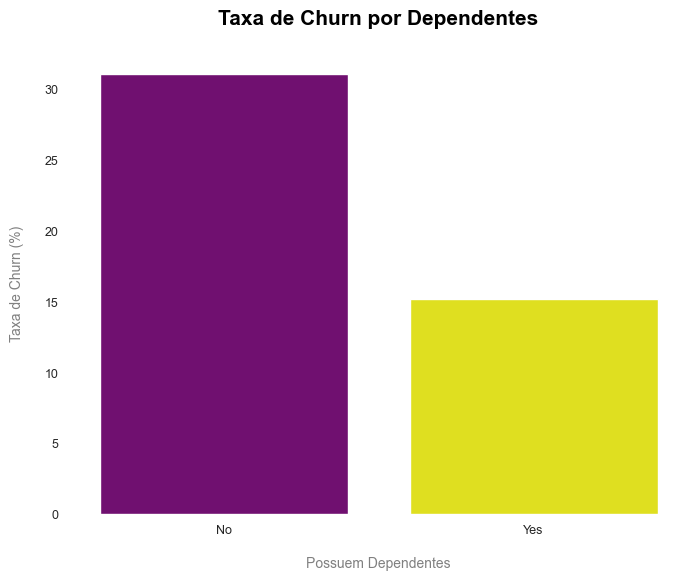

In [43]:
# Utilizando a função barplot para mostrar as taxas de churn por clientes que possuem dependentes
barplot(taxa_dependentes, ('Possuem Dependentes', 'Taxa de Churn por Dependentes'))

Os clientes que não possuem dependentes tem taxa de churn superior, o que pode ser um indicativo de que deveria haver algum incentivo para estes consumidores a fim de retê-los na empresa.

No entanto, para tomar qualquer decisão é necessário testar se essas variáveis ('Dependents' e 'Churn') estão associadas. Para isso, utilizamos o teste qui-quadrado para independência:

In [44]:
# Cálculo do teste qui-quadrado
qui_quadrado(churn_dependents, 'Dependents', 'Churn')

A estatística de teste calculada foi: 146.24959511579357
O p-valor calculado foi: 1.1449228963616061e-33


Foi possível observar, pelo cálculo do p-valor, que, a um nível de 5% de significância, as duas variáveis ('Dependents'e 'Churn') não são independentes. Isso pode reforçar a narrativa de que, de fato, o grupo de clientes que não possui dependentes é mais propenso a deixar os serviços da empresa. Com base nisso, é válido destacar que estes consumidores devem ser incentivados a ficar na empresa por meio de bonificações e/ou promoções.

Apesar dessas considerações baseadas em estatística descritiva, é necessário ir além e realizar uma análise de correspondência a fim de verificar se os clientes que não possuem dependentes realmente são mais propensos a deixar os serviços da empresa.

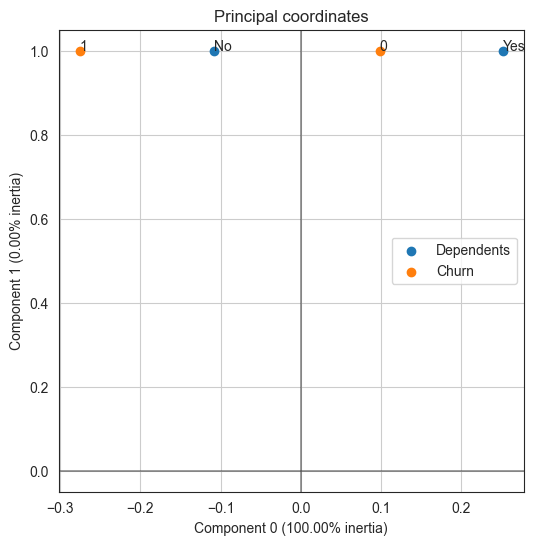

In [45]:
# Chamando a função de análise de correspondência
anacor(churn_dependents, 'Dependents', 2)

Como é possível observar, a análise de correspondência também aponta que os indivíduos sem dependentes são mais propensos a saírem da empresa.

#### <a> Churn e MultipleLines </a> 

In [46]:
# Criando DataFrame com informações de apenas 'MultipleLines' e 'Churn' 
churn_mult_lines = df_customers.loc[:, ['MultipleLines', 'Churn']]

In [47]:
# Calculando a taxa de churn
taxa_multiple_lines = taxa_churn(churn_mult_lines, 'MultipleLines', 'Churn')
taxa_multiple_lines

Churn,0,1,Percentual
MultipleLines,,,
No,2011,681,25.30
No phone service,420,132,23.91
Yes,1708,682,28.54


In [48]:
# Resultados
print(f"{taxa_multiple_lines['Percentual'][0]:.2f}% dos clientes que não possuem múltiplas linhas saíram da empresa")
print(f"{taxa_multiple_lines['Percentual'][1]:.2f}% dos clientes que não possuem serviços de telefone saíram da empresa")
print(f"{taxa_multiple_lines['Percentual'][2]:.2f}% dos clientes que possuem múltiplas linhas saíram da empresa")

25.30% dos clientes que não possuem múltiplas linhas saíram da empresa
23.91% dos clientes que não possuem serviços de telefone saíram da empresa
28.54% dos clientes que possuem múltiplas linhas saíram da empresa


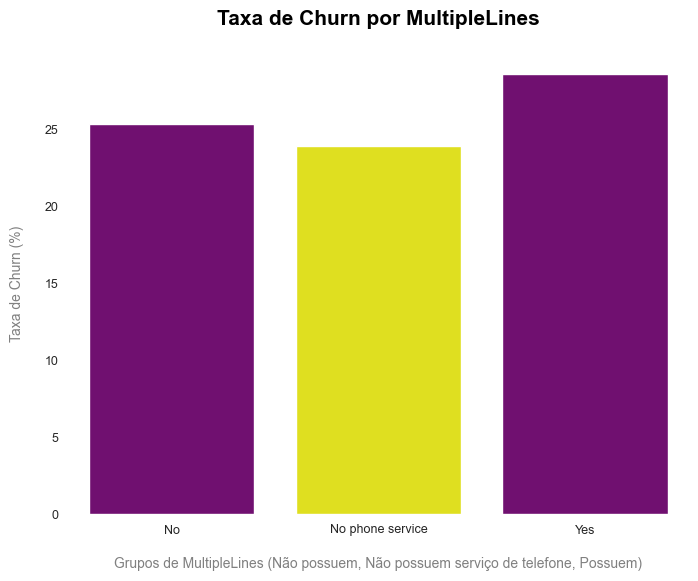

In [49]:
# Visualizando a taxa de churn por grupos associados a 'MultipleLines'
barplot(taxa_multiple_lines, ('Grupos de MultipleLines (Não possuem, Não possuem serviço de telefone, Possuem)', 'Taxa de Churn por MultipleLines'))

Os grupos não apresentam diferenças substanciais em termos de taxa de churn. No entanto, ainda é necessário utilizar o teste qui-quadrado a fim de investigar a relação entre a variável 'MultipleLines' e a variável 'Churn'.

In [50]:
# Cálculo do teste qui-quadrado
qui_quadrado(churn_mult_lines, 'MultipleLines', 'Churn')

A estatística de teste calculada foi: 8.96933931231846
O p-valor calculado foi: 0.011280613386450603


De acordo com o teste qui-quadrado, percebe-se que até mesmo a um nível de significância de 2% é possível rejeitar a hipótese nula. Dessa forma, depreende-se que a variável 'MultipleLines' está associada ao Churn.

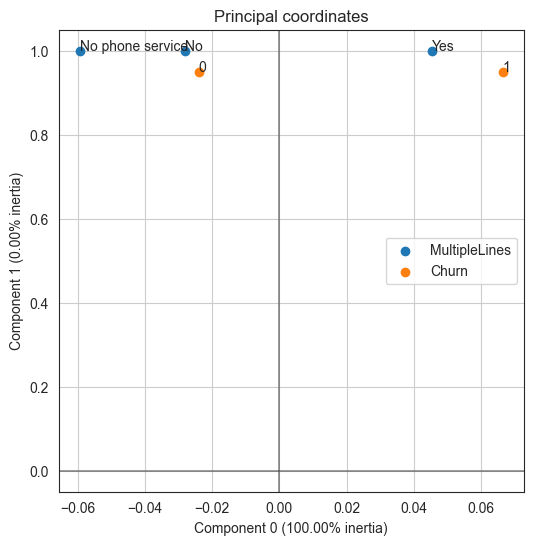

In [51]:
# Chamando a função anacor 
anacor(churn_mult_lines, 'MultipleLines', 2)

De fato, quem possui múltiplas linhas telefônicas é estatisticamente mais propenso a sair da empresa. Em contrapatida, quem não utiliza serviço telefônico ou não possui mais de uma linha telefônica não são propensos ao churn.

#### <a> Churn e InternetService </a> 

In [52]:
# Criando DataFrame com informações de apenas InternetService e 'Churn' 
churn_internet = df_customers.loc[:, ['InternetService', 'Churn']]

In [53]:
# Calculando a taxa de churn relacionada a InternetService
taxa_internet = taxa_churn(churn_internet, 'InternetService', 'Churn')
taxa_internet

Churn,0,1,Percentual
InternetService,,,
DSL,1600,359,18.33
Fiber optic,1402,1049,42.80
No,1137,87,7.11


In [54]:
# Resultados
print(f"{taxa_internet['Percentual'][0]:.2f}% dos clientes que possuem serviços de internet do tipo DSL saíram da empresa")
print(f"{taxa_internet['Percentual'][1]:.2f}% dos clientes que possuem serviços de internet do tipo fibra óptica saíram da empresa")
print(f"{taxa_internet['Percentual'][2]:.2f}% dos clientes que não possuem serviços de internet saíram da empresa")

18.33% dos clientes que possuem serviços de internet do tipo DSL saíram da empresa
42.80% dos clientes que possuem serviços de internet do tipo fibra óptica saíram da empresa
7.11% dos clientes que não possuem serviços de internet saíram da empresa


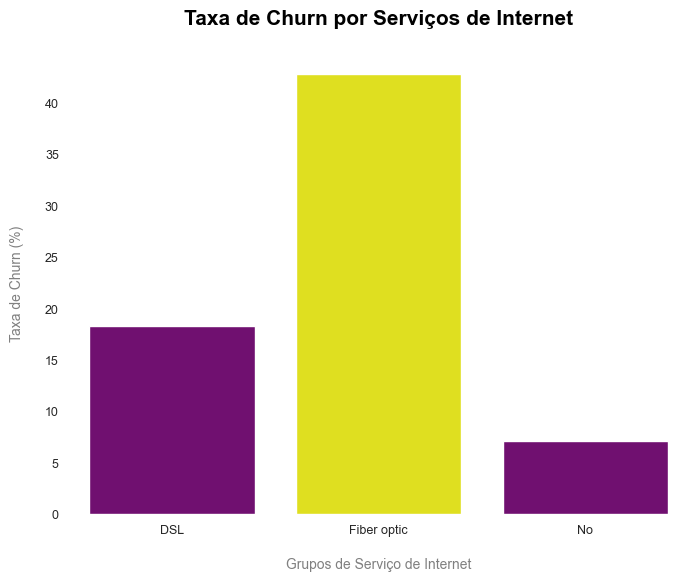

In [55]:
# Visualizando a taxa de churn por grupos associados ao serviço de internet
barplot(taxa_internet, ('Grupos de Serviço de Internet', 'Taxa de Churn por Serviços de Internet'))

Obs: 

'DSL' se refere à Digital Subscriber Line

'Fiber optic' se refere à fibra óptica 

'No' se refere a clientes que não possuem serviços de internet com a empresa

É nítido que a maior taxa de churn se dá entre os clientes que possuem acesso à internet por meio de fibra óptica. Isso pode ser um indicativo de que a qualidade desses serviços não tem agradado os clientes.

In [56]:
# Cálculo do teste qui-quadrado para independência de variáveis
qui_quadrado(churn_internet, 'InternetService', 'Churn')

A estatística de teste calculada foi: 637.2699343866905
O p-valor calculado foi: 4.155200710126833e-139


O p-valor calculado permite rejeitar a hipótese nula a 5% de significância. Dessa forma, conclui-se que as variáveis 'InternetService' e 'Churn' não são independentes.

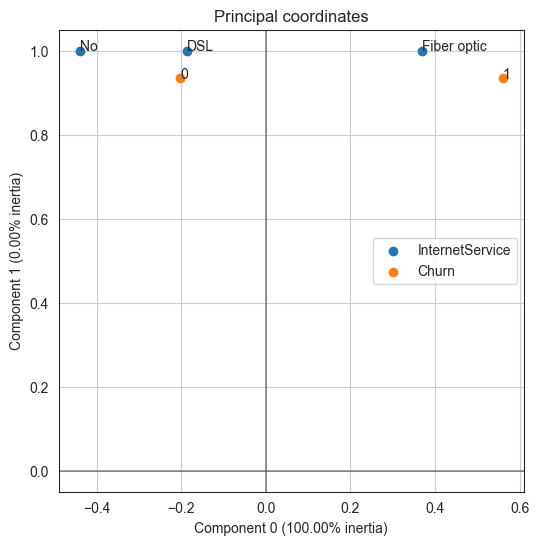

In [57]:
# Chamando a função anacor para identificar relações 
anacor(churn_internet, 'InternetService', 2)

Como o gráfico de coordenadas principais sugere, há uma associação entre a categoria Fibra Óptica da variável 'InternetService' e a categoria 1 da variável 'Churn'. Isso significa que, de fato, clientes que tem acesso à internet por meio de fibra óptica são mais propensos a saírem da empresa. Uma possível razão desse fato pode ser o comprometimento da qualidade dos serviços de fibra óptica. No entanto, para um diagnóstico mais preciso, são necessárias investigações mais profundas nesse sentido.

#### <a> Churn e PhoneService </a> 

In [58]:
# Criando DataFrame apenas com informações de Churn e PhoneService
churn_phone = df_customers.loc[:, ['PhoneService', 'Churn']]

In [59]:
# Utilizando a função taxa_churn para calcular os percentuais de churn de acordo com as classes de 'PhoneService'
taxa_phone = taxa_churn(churn_phone, 'PhoneService', 'Churn')
taxa_phone

Churn,0,1,Percentual
PhoneService,,,
No,420,132,23.91
Yes,3719,1363,26.82


In [60]:
# Resultados
print(f"{taxa_phone['Percentual'][0]:.2f}% dos clientes que não possuem serviços telefônicos saíram da empresa")
print(f"{taxa_phone['Percentual'][1]:.2f}% dos clientes que possuem serviços telefônicos saíram da empresa")

23.91% dos clientes que não possuem serviços telefônicos saíram da empresa
26.82% dos clientes que possuem serviços telefônicos saíram da empresa


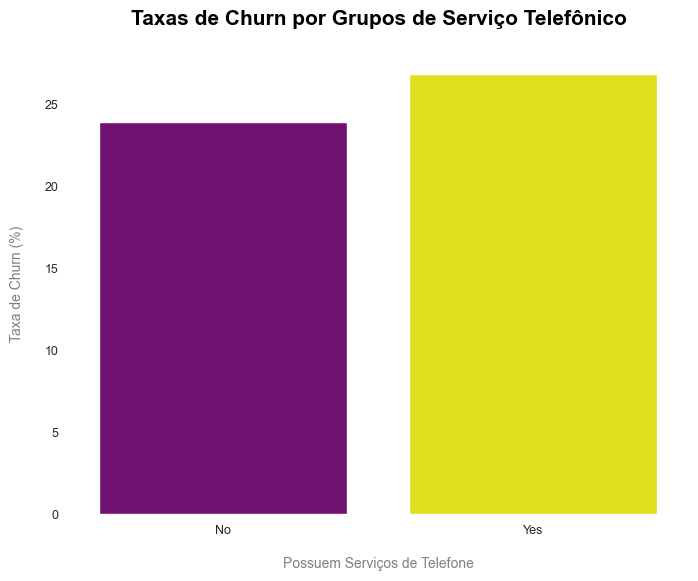

In [61]:
# Utilizando a função barplot para plotar as taxas
barplot(taxa_phone, ('Possuem Serviços de Telefone', 'Taxas de Churn por Grupos de Serviço Telefônico'))

As taxas de churn entre os grupos são bem similares. Evidentemente o teste qui-quadrado é útil para identificar se essas variáveis estão (ou não) associadas.

In [62]:
# Utilizando a função qui_quadrado para independência
qui_quadrado(churn_phone, 'PhoneService', 'Churn')

A estatística de teste calculada foi: 2.0120656590236914
O p-valor calculado foi: 0.156052715302386


De acordo com o p-valor calculado, a um nível de 16% de significância seria possível rejeitar a hipótese nula. No entanto, como o nível de significância que foi adotado neste trabalho é de 5%, a hipótese nula não pode ser rejeitada. Dessa forma, conclui-se que as variáveis 'PhoneService' e 'Churn' são, de fato, independentes.

#### <a> Analisando Desbalanceamento de Classes </a> 

In [63]:
# Criando função para visualização de countplot
def countplot(dados, legenda):
    '''
    Cria um countplot contendo a quantidade de vezes em que 
    houve/não houve churn por meio dos argumentos:
    dados: DataFrame original
    legenda: Tupla de strings relacionadas, nessa ordem, a:
    1) Legenda para o eixo x
    2) Título do Gráfico
    '''
    # Definindo cores para a paleta
    color = ['#800080', '#FFFF00'] 
    
    # Setando estilo do seaborn 
    sns.set_style("white") 
    
    # Definindo tamanho do objeto figure
    plt.figure(figsize=(8,6)) 
    
    # Plotando gráfico
    sns.countplot(data = dados, x = dados['Churn'], palette = color)
    sns.despine(bottom = True, left = True) # Retirando bordas
    plt.ylabel("[]", color = 'grey', fontsize = 0, labelpad = 15) # Tirando legenda do eixo y
    plt.tick_params(axis = 'y', labelsize = 9, color = 'grey') # e ajustando eixo y
    plt.xlabel(f"{legenda[0]}", color = 'grey', fontsize = 10, labelpad = 15) # Colocando legenda 
    plt.tick_params(axis = 'x', labelsize = 9, color = 'grey') # e ajustando o eixo x
    plt.title(f"{legenda[1]}", color = 'k', pad = 20, fontsize = 15, fontweight = 'bold') # Colocando título
    
    # Mostrnado
    plt.show()

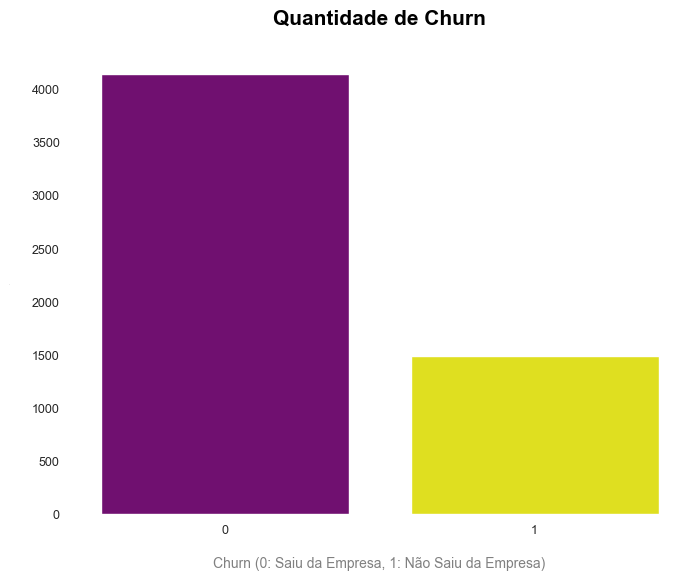

In [64]:
# Utilizando a função para verificar se as classes estão desbalanceadas
countplot(df_customers, ("Churn (0: Saiu da Empresa, 1: Não Saiu da Empresa)", "Quantidade de Churn"))

Há um nítido desbalanceamento de classes. Os clientes que saíram representam menos da metade dos clientes que permaneceram na empresa. Esse fato é importante para escolher a melhor métrica de avaliação do modelo preditivo a ser construído. 

In [65]:
# Verificando os números de quem ficou/saiu
print(f"{len(df_customers.loc[df_customers['Churn'] == 0])} clientes permaneceram na empresa")
print(f"{len(df_customers.loc[df_customers['Churn'] == 1])} clientes saíram da empresa")

4139 clientes permaneceram na empresa
1495 clientes saíram da empresa


In [66]:
# Calculando o percentual de clientes que permaneceram na empresa
(len(df_customers.loc[df_customers['Churn'] == 0])/df_customers.shape[0]) * 100

73.46467873624422

Como o percentual de clientes que saíram da empresa é de 73.46%, o modelo que será construído deve ultrapassar esse valor em termos de acurácia para que seja gerado valor para empresa. 

### <a> Conclusões da Análise Exploratória de Dados </a> 

Ao longo de toda essa etapa, algumas constatações puderam ser feitas. Dentre elas, destacam-se:

1) A presença de muitos clientes novos na empresa.
2) O baixo nível de despesas mensais da maioria dos clientes

Com base apenas na análise exploratória, é possível sugerir que a empresa observe o perfil do cliente propenso ao churn e alinhe suas estratégias com base nisso. Nesse sentido, a análise do teste qui-quadrado e a análise de associação de categorias (ANACOR) foi extremamente útil. Com as duas técnicas, foi possível identificar que o cliente propenso ao churn:

- Não possui dependentes

- Possui múltiplas linhas telefônicas

- Possui acesso à internet por meio de fibra óptica

Levando esse perfil em consideração, é importante que a empresa possa acompanhar de perto a situação de cada grupo descrito. Sendo assim, é interessante adotar medidas que garantam a satisfação destes clientes.

* Em relação aos clientes que não possuem dependentes, é válido considerar benefícios nos serviços, como descontos ou promoções especiais.

* Já no que diz respeito aos clientes com múltiplas linhas telefônicas, é possível oferecer planos de fidelidade ou descontos a partir da contratação de um número específico de linhas telefônicas.

* Além disso, para os clientes que utilizam fibra óptica é apropriado utilizar de questionários para verificar a qualidade do serviço. Após isso, tendo o diagnóstico em mãos, é importante trabalhar na contínua melhoria dos pontos negativos levantados pelos clientes.

Um dos pilares da análise de correspondência (após o uso do teste qui-quadrado) consiste na capacidade de alocação de recursos de forma mais eficiente. Isso ocorre já que, por meio da identificação de associações (estatisticamente significantes) com o churn, é possível aplicar recursos onde, de fato, há necessidade. Dessa forma, é possível gerar valor para a organização no que diz respeito ao mapeamento preciso dos problemas que ela enfrenta.